<a href="https://colab.research.google.com/github/gksthdals/NLTK/blob/main/04.%20Writing_Structured_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Back to the Basics

### Assignment

In [1]:
foo = 'Monty'
bar = foo
foo = 'Python'
bar

'Monty'

In [2]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
bar

['Monty', 'Bodkin']

In [6]:
empty = []
nested = [empty, empty, empty]
nested

[[], [], []]

In [7]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

In [8]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

### Equality

In [9]:
size = 5
python = ['Python']
snake_nest = [python] * size
print(snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4])
print(snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4])

True
True


In [10]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
print(snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4])
print(snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4])

True
False


In [11]:
[id(snake) for snake in snake_nest]

[140418962973632,
 140418962973632,
 140418962973632,
 140418962973632,
 140418963161968]

### Conditionals

In [12]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
  if element:
    print(element)

cat
['dog']


In [13]:
animals = ['cat', 'dog']
if 'cat' in animals:
  print(1)
elif 'dog' in animals:
  print(2)

1


In [14]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
print(all(len(w) > 4 for w in sent))
print(any(len(w) > 4 for w in sent))

False
True


## 2. Sequences

In [15]:
t = 'walk', 'fem', 3
t

('walk', 'fem', 3)

In [16]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [17]:
len(raw), len(text), len(pair)

(29, 5, 2)

### Operating on Sequence Types

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry.'
text = nltk.word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)

[',', '.', 'Red', 'lorry', 'red', 'yellow']

In [25]:
for key in fdist:
  print(key + ':', fdist[key], end='; ')

Red: 1; lorry: 4; ,: 3; yellow: 2; red: 1; .: 1; 

In [26]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [27]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [28]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [30]:
nltk.download('nps_chat')

[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.


True

In [32]:
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
print(text == training_data + test_data)
print(len(training_data) / len(test_data))

True
9.0


### Combining Different Sequence Types

In [33]:
words = 'I turned off the spectroroute'.split()
wordlens = [(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [34]:
lexicon = [
           ('the', 'det', ['Di:', 'D@']),
           ('off', 'prep', ['Qf', '0:f'])
]

In [35]:
lexicon.sort()
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
print(lexicon)
del lexicon[0]
print(lexicon)

[('off', 'prep', ['Qf', '0:f']), ('turned', 'VBD', ['t3:nd', 't3`nd'])]
[('turned', 'VBD', ['t3:nd', 't3`nd'])]


### Generator Expressions

In [36]:
from nltk.tokenize import word_tokenize

text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
  "it means just what I choose it to mean - neither more nor less."'''
[w.lower() for w in word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 '``',
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [37]:
max([w.lower() for w in word_tokenize(text)])

'word'

## 3. Questions of Style

### Python Coding Style

### Procedural vs Declarative Style

In [39]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [40]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
  count += 1
  total += len(token)
total / count

4.401545438271973

In [41]:
total = sum(len(t) for t in tokens)
total / len(tokens)

4.401545438271973

In [ ]:
word_list = []
i = 0
while i < len(tokens):
  j = 0
  while j < len(word_list) and word_list[j] <= tokens[i]:
    j += 1
    if j == 0 or tokens[i] != word_list[j-1]:
      word_list.insert(j, tokens[i])
    i += 1

In [45]:
word_list2 = sorted(set(tokens))

In [46]:
word_list == word_list2

False

In [47]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank,  word in enumerate(most_common_words):
  cumulative += fd.freq(word)
  print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
  if cumulative > 0.25:
    break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [48]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
  if len(word) > len(longest):
    longest = word
longest

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


'unextinguishable'

In [49]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

### Some Legitimate Uses for Counters

In [50]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [52]:
import pprint
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [53]:
array = [[set()] * n] * m
array[2][5].add('Alice')
pprint.pprint(array)

[[{'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}],
 [{'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}],
 [{'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}, {'Alice'}]]


## 4. Functions: The Foundation of Structured Programming

In [54]:
import re

def get_text(file):
  """Read text from a file, normalizing whitespace and stripping HTML markup."""
  text = open(file).read()
  text = re.sub(r'<.*?>', ' ', text)
  text = re.sub('\s+', ' ', text)
  return text

### Function Inputs and Outputs

In [56]:
def repeat(msg, num):
  return ' '.join([msg] * num)

monty = 'Monty Python'
repeat(monty, 3)

'Monty Python Monty Python Monty Python'

In [57]:
def monty():
  return "Monty Python"

monty()

'Monty Python'

In [58]:
repeat(monty(), 3)

'Monty Python Monty Python Monty Python'

### Parameter Passing

In [59]:
def set_up(word, properties):
  word = 'lolcat'
  properties.append('noun')
  properties = 5

In [61]:
w = ''
p = []
set_up(w, p)

In [62]:
w

''

In [63]:
p

['noun']

In [64]:
w = ''
word = w
word = 'lolcat'
w

''

In [65]:
p = []
properties = p
properties.append('noun')
properies = 5
p

['noun']

### Variable Scope

### Checking Parameter Types

In [66]:
def tag(word):
  if word in ['a', 'the', 'all']:
    return 'det'
  else:
    return 'noun'

In [69]:
def tag(word):
  assert isinstance(word, str), "argument to tag() must be a string"
  if word in ['a', 'the', 'all']:
    return 'det'
  else:
    return 'noun'

In [70]:
tag(['Monty', 'Python'])

AssertionError: ignored

### Functional Decomposition

In [73]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
  html = request.urlopen(url).read().decode('utf8')
  raw = BeautifulSoup(html, 'html.parser').get_text()
  for word in word_tokenize(raw):
    freqdist[word.lower()] += 1
  result = []
  for word, count in freqdist.most_common(n):
    result = result + [word]
  print(result)

In [74]:
constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 30)

["''", ',', ':', ':1', 'the', ';', '(', ')', '``', 'of', '{', '}', '?', 'url', 'https', '@', 'import', 'r7mput', "'", 'documents', '#', 'and', 'archives', '.', '[', ']', 'a', 'national', 'constitution', 'founding']


In [77]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
  html = request.urlopen(url).read().decode('utf8')
  text = BeautifulSoup(html, 'html.parser').get_text()
  freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
  return [word for (word, _) in fd.most_common(n)]

In [78]:
freq_words(constitution, 30)

["''",
 ',',
 ':',
 ':1',
 'the',
 ';',
 '(',
 ')',
 '``',
 'of',
 '{',
 '}',
 '?',
 'url',
 'https',
 '@',
 'import',
 'r7mput',
 "'",
 'documents',
 '#',
 'and',
 'archives',
 '.',
 '[',
 ']',
 'a',
 'national',
 'constitution',
 'founding']

### Documenting Functions

In [80]:
def accuracy(reference, test):
  """
  Calculate the fraction of test items that equal the corresponding reference items.

  Given a list of reference values and a corresponding list of test values,
  return the fraction of corresponding values that are equal.
  In particular, return the fraction of indexes.
  {0<i<=len(test)} such that C{test[i] == reference[i]}.

      >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
      0.5
  
  :param reference: An ordered list of reference values
  :type reference: list
  :param test: A list of values to compare against the corresponding
      reference values
  :type test: list
  :return: the accuracy score
  :rtype: float
  :raises ValueError: If reference and test do not have the same length
  """

  if len(reference) != len(test):
    raise ValueError("Lists must have the same length.")
  num_correct = 0
  for x, y in zip(reference, test):
    if x == y:
      num_correct += 1
  return float(num_correct) / len(reference)

## 5. Doing More with Functions

### Functions as Arguments

In [81]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

def extract_property(prop):
  return [prop(word) for word in sent]

extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [82]:
def last_letter(word):
  return word[-1]

extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [83]:
sorted(sent)

[',',
 '.',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

### Accumulative Functions

In [85]:
def search1(substring, words):
  result = []
  for word in words:
    if substring in word:
      result.append(word)
  
  return result

def search2(substring, words):
  for word in words:
    if substring in word:
      yield word

In [86]:
for item in search1('zz', nltk.corpus.brown.words()):
  print(item, end=' ')

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [87]:
for item in search2('zz', nltk.corpus.brown.words()):
  print(item, end=' ')

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [88]:
def permutations(seq):
  if len(seq) <= 1:
    yield seq

  else:
    for perm in permutations(seq[1:]):
      for i in range(len(perm)+1):
        yield perm[:i] + seq[0:1] + perm[i:]

In [89]:
list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

### Higher-Order Functions

In [90]:
def is_content_word(word):
  return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

In [92]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [93]:
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [94]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [95]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [96]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In [100]:
list(map(lambda w: len(list(filter(lambda c: c.lower() in "aeiou", w))), sent))

[2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 3, 0]

### Named Arguments

In [101]:
def repeat(msg='<empty>', num=1):
  return msg * num

repeat(num=3)

'<empty><empty><empty>'

In [102]:
repeat(msg='Alice')

'Alice'

In [103]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

In [104]:
def generic(*args, **kwargs):
  print(args)
  print(kwargs)

generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [105]:
song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]

list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [106]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [107]:
def freq_words(file, min=1, num=10):
  text = open(file).read()
  tokens = word_tokenize(text)
  freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
  return freqdist.most_common(num)

In [108]:
def freq_word(file, min=1, num=10, verbose=False):
  freqdist = FreqDist()
  if verbose: print("Opening", file)
  text = open(file).read()
  if verbose: print("Read in %d characters" % len(file))
  for word in word_tokenize(text):
    if len(word) >= min:
      freqdist[word] += 1
      if verbose and freqdist.N() % 100 == 0: print(".", sep="")
  if verbose: print
  return freqdist.most_common(num)

## 6. Program Development

### Structure of a Python Module

In [109]:
nltk.metrics.distance.__file__

AttributeError: ignored

### Multi-Module Programs

### Sources of Error

In [1]:
def find_words(text, wordlength, result=[]):
  for word in text:
    if len(word) == wordlength:
      result.append(word)
  return result

In [120]:
print(find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3))
print(find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur']))
print(find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3))

['omg', 'teh', 'teh', 'mat']
['ur', 'on']
['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']


### Debugging Techniques

In [2]:
import pdb

find_words(['cat'], 3)

['cat']

In [ ]:
# pdb.run("find_words(['cat'], 3)")

### Defensive Programming

In [ ]:
# http://docs.python.org/library/doctest.html

## 7. Algorithm Design

### Recursion

In [3]:
def factorial(n):
  result = 1
  for i in range(n):
    result *= (i+1)
  return result

In [4]:
def factorial2(n):
  if n == 1:
    return 1
  else:
    return n * factorial2(n-1)

In [7]:
def size1(s):
  return 1 + sum(size1(child) for child in s.hyponyms())

In [8]:
def size2(s):
  layer = [s]
  total = 0
  while layer:
    total += len(layer)
    layer = [h for c in layer for h in c.hyponyms()]
  return total

In [12]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

dog = wn.synset('dog.n.01')
print(size1(dog))
print(size2(dog))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
190
190


In [13]:
def insert(trie, key, value):
  if key:
    first, rest = key[0], key[1:]
    if first not in trie:
      trie[first] = {}
    insert(trie[first], rest, value)
  else:
    trie['value'] = value

In [15]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
dict(trie)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}}, 't': {'value': 'cat'}},
   'i': {'c': {'value': 'stylish'}, 'e': {'n': {'value': 'dog'}}}}}}

In [20]:
trie['c']['h']['a']['t']['value']

'cat'

In [18]:
import pprint
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


### Space-Time Tradeoffs

In [24]:
nltk.download('movie_reviews')
import re

def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Building Index...
query> hello
fell into some weird liquid ( hello ? joker ? ) and now has 
                              hello kids . today the movie s
t walk towards them yelling " hello " . once you yell " hell
t walk towards them yelling " hello " . once you yell " hell
classmate he can't remember . hello mrs . robinson ! though 
nds with stupid lines ( " say hello to king tut , asswhole !
 no going down on someone . " hello ? i was in the office an
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit wh

In [25]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [26]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size
setup_set = "import random; vocab = set(range(%d))" % vocab_size
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)

print(Timer(statement, setup_list).timeit(1000))
print(Timer(statement, setup_set).timeit(1000))

0.0025606159997551003
0.001532821999717271


### Dynamic Programming

In [33]:
# recursive
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

# bottom-up
def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

# top-down
def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]


# built-in memoization
from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]

        return s + l

In [28]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [29]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [31]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [34]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

## 8. A Sample of Python Libraries

### Matplotlib

In [ ]:
# http://matplotlib.sourceforge.net/

In [35]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

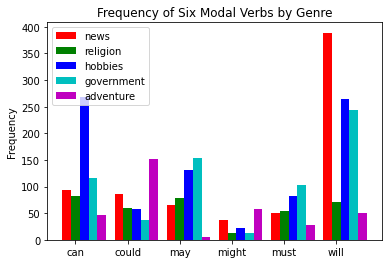

In [36]:
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in genres
            for word in nltk.corpus.brown.words(categories=genre)
            if word in modals)

counts = {}
for genre in genres:
    counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [38]:
from matplotlib import use, pyplot
use('Agg')
pyplot.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


<Figure size 432x288 with 0 Axes>

### NetworkX

In [ ]:
# https://networkx.lanl.gov/

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph, pos=graphviz_layout(graph),
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

In [ ]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

### csv

In [ ]:
import csv
input_file = open("lexicon.csv", "rb")
for row in csv.reader(input_file):
  print(row)

### Numpy

In [48]:
from numpy import array
cube = array([ [[0, 0, 0], [1, 1, 1], [2, 2, 2]],
               [[3, 3, 3], [4, 4, 4], [5, 5, 5]],
               [[6, 6, 6], [7, 7, 7], [8, 8, 8]] ])
cube[1,1,1]

4

In [50]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [52]:
cube[2, 1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [53]:
from numpy import linalg
a = array([[4, 0], [3, -5]])
u, s, vt = linalg.svd(a)

In [54]:
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])

In [55]:
s

array([6.32455532, 3.16227766])

In [56]:
vt

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

### Other Python Libraries

In [ ]:
# http://pypi.python.org/